In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
with open('twitter_combined.txt') as f:
    mylist = [tuple(map(int, i.split(' '))) for i in f]

In [3]:
T = nx.DiGraph()
subList = [(a, b) for a, b in mylist if a < 1000 and b < 1000]
T.add_edges_from(subList)
print("Number of nodes = " + str(len(T.nodes())))
print("Number of edges = " + str(len(T.edges())))

Number of nodes = 34
Number of edges = 149


In [4]:
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()
    
    # Iterate over all nodes in G
    for n in G.nodes():
    
        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:
        
            # Add the node n to the set
            nodes.add(n)
            
    # Return the nodes with m neighbors
    return nodes

# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(T, 6)
print(six_nbrs)


{648, 785}


In [5]:
# Compute the degree of every node: degrees
degrees = [len(list(T.neighbors(n))) for n in T.nodes()]

# Print the degrees
print(degrees)

[4, 2, 4, 2, 13, 3, 15, 9, 0, 12, 1, 1, 9, 2, 2, 8, 9, 6, 6, 8, 5, 10, 5, 2, 1, 0, 2, 1, 0, 0, 2, 2, 2, 1]


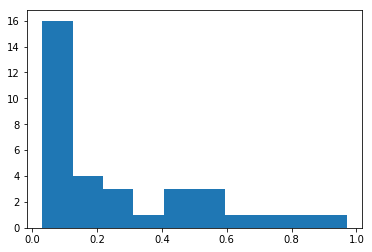

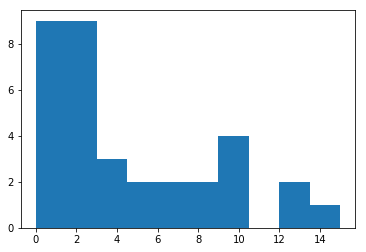

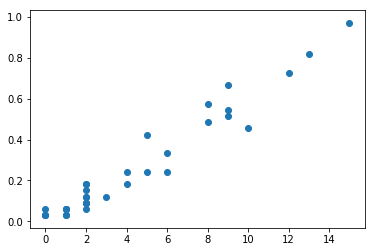

In [6]:
# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(T)

# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees)
plt.show()

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(degrees, list(deg_cent.values()))
plt.show()

In [7]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]
    
    for node in queue:  
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])
        
        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

In [8]:
import random
[path_exists(T, n, random.choice(list(T.nodes()))) for n in T.nodes()]

Path does not exist between nodes 47 and 586
Path does not exist between nodes 380 and 746
Path does not exist between nodes 14 and 648
Path exists between nodes 528 and 939
Path exists between nodes 586 and 13
Path does not exist between nodes 761 and 573
Path exists between nodes 20 and 767
Path does not exist between nodes 989 and 949
Path does not exist between nodes 66 and 246
Path does not exist between nodes 418 and 107
Path does not exist between nodes 922 and 765
Path does not exist between nodes 573 and 422
Path exists between nodes 12 and 13
Path does not exist between nodes 409 and 246
Path does not exist between nodes 107 and 14
Path does not exist between nodes 13 and 761
Path does not exist between nodes 422 and 528
Path exists between nodes 785 and 13
Path does not exist between nodes 648 and 47
Path does not exist between nodes 295 and 528
Path does not exist between nodes 291 and 47
Path does not exist between nodes 885 and 929
Path does not exist between nodes 767 an

[False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [9]:
for n in T.nodes():
    path_exists(T, 20, n)

Path does not exist between nodes 20 and 47
Path does not exist between nodes 20 and 380
Path does not exist between nodes 20 and 14
Path does not exist between nodes 20 and 528
Path exists between nodes 20 and 586
Path does not exist between nodes 20 and 761
Path does not exist between nodes 20 and 20
Path exists between nodes 20 and 989
Path exists between nodes 20 and 66
Path exists between nodes 20 and 418
Path does not exist between nodes 20 and 922
Path does not exist between nodes 20 and 573
Path does not exist between nodes 20 and 12
Path does not exist between nodes 20 and 409
Path exists between nodes 20 and 107
Path exists between nodes 20 and 13
Path exists between nodes 20 and 422
Path does not exist between nodes 20 and 785
Path exists between nodes 20 and 648
Path exists between nodes 20 and 295
Path exists between nodes 20 and 291
Path exists between nodes 20 and 885
Path exists between nodes 20 and 767
Path does not exist between nodes 20 and 246
Path does not exist be

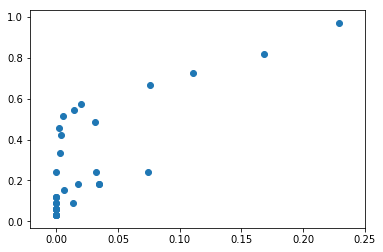

In [10]:
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(T)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(T)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(bet_cen.values()), list(deg_cen.values()))

# Display the plot
plt.show()

In [11]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)
    
    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))
    
    nodes = set()
    
    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():
    
        # Check if the current value has the maximum degree centrality
        if v == max_dc:
        
            # Add the current node to the set of nodes
            nodes.add(k)
            
    return nodes
    
# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(T)
print(top_dc)

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(T)[node] == max(nx.degree_centrality(T).values())

{20}


In [12]:
# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)
    
    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))
    
    nodes = set()
    
    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():
    
        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:
        
            # Add the current node to the set of nodes
            nodes.add(k)
            
    return nodes

# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(T)
print(top_bc)

# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(T)[node] == max(nx.betweenness_centrality(T).values())

{20}
